# 평범한 배낭 
- source : [백준 12865](https://www.acmicpc.net/problem/12865)
- 난이도 : 골드 V
- 분류 : 다이나믹 프로그래밍, 배낭 문제

## 문제
- 이 문제는 아주 평범한 배낭에 관한 문제이다.

- 한 달 후면 국가의 부름을 받게 되는 준서는 여행을 가려고 한다. 세상과의 단절을 슬퍼하며 최대한 즐기기 위한 여행이기 때문에, 가지고 다닐 배낭 또한 최대한 가치 있게 싸려고 한다.

- 준서가 여행에 필요하다고 생각하는 N개의 물건이 있다. 각 물건은 무게 W와 가치 V를 가지는데, 해당 물건을 배낭에 넣어서 가면 준서가 V만큼 즐길 수 있다. 아직 행군을 해본 적이 없는 준서는 최대 K만큼의 무게만을 넣을 수 있는 배낭만 들고 다닐 수 있다. 준서가 최대한 즐거운 여행을 하기 위해 배낭에 넣을 수 있는 물건들의 가치의 최댓값을 알려주자.
    
## 입력
- 첫 줄에 물품의 수 N(1 ≤ N ≤ 100)과 준서가 버틸 수 있는 무게 K(1 ≤ K ≤ 100,000)가 주어진다. 두 번째 줄부터 N개의 줄에 거쳐 각 물건의 무게 W(1 ≤ W ≤ 100,000)와 해당 물건의 가치 V(0 ≤ V ≤ 1,000)가 주어진다.

- 입력으로 주어지는 모든 수는 정수이다.

## 출력
- 한 줄에 배낭에 넣을 수 있는 물건들의 가치합의 최댓값을 출력한다.

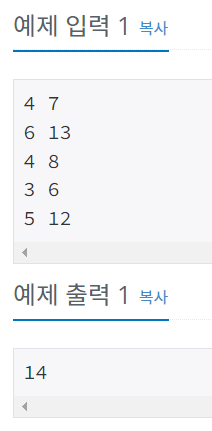

In [20]:
n, k = 4, 7
stuff = [[0, 0],
        [6, 13],
         [4, 8],
         [3, 6],
         [5, 12]]
# 출력 : 14



dp = [[0 for _ in range(k+1)] for _ in range(n+1)]

for i in range(1, n+1):
    for j in range(1, k+1):
        weight = stuff[i][0]
        value = stuff[i][-1]
        
        if j < weight:
            dp[i][j] = dp[i-1][j]
            
        else:
            dp[i][j] = max(dp[i-1][j], value+dp[i-1][j-weight])

print(dp[n][k])

14


dp 배열을 그려가면서 여러 블로그를 참고해 한 단계 한 단계 진행하니 이해할 수 있었다.    
   
이중 for문 안의 if-else문이 핵심이기 때문에 해당 부분에 대해 설명해보겠다.
- j = 채우고자 하는 배낭의 크기 (최종 목표인 k까지 1씩 증가한다.)
- weight = 현재 탐색하는 짐의 무게
```
if j < weight:
       dp[i][j] = dp[i-1][j]
```
- 짐의 무게가 배낭보다 크다면, 해당 짐은 배낭에 넣을 수 없다.
- 따라서, 전 단계에서 탐색해 j크기의 배낭에 넣었던 짐의 가치를 그대로 가져온다.

```
else:
    dp[i][j] = max(dp[i-1][j], value+dp[i-1][j-weight])
```
- 짐이 배낭에 들어갈 수 있는 경우
- 두 가지 경우 중 최댓값을 선택한다.
1. 전 단계에서 탐색한 짐을 넣었을 경우 (현재 짐을 넣지 않는다.)
2. 현재 짐을 넣을 수 있는 공간을 만든 후, 현재 짐을 넣는다. 
    - 현재 짐을 넣었기 때문에 현재 짐의 가치(value)를 넣고,
    - 현재 짐을 넣고 남은 공간(j-weight)에 짐을 넣는다. (dp\[i-1\]\[j-weight\])
        - 짐은 중복해서 넣을 수 없기 때문에 전 단계에서 탐색한 짐으로 채웠을 경우를 고려한다.   
        
중복해서 넣을 수 있다고 착각해 dp\[i\]\[j-weight\] 이 코드가 왜 아닌지 조금 헤맸다.       




**최종 코드**

In [ ]:
import sys

inp = sys.stdin.readline

n, k = map(int, inp().split())
stuff = [[0, 0]]

for _ in range(n):
    stuff.append(list(map(int, inp().split())))


dp = [[0 for _ in range(k+1)] for _ in range(n+1)]

for i in range(1, n+1):
    for j in range(1, k+1):
        weight = stuff[i][0]
        value = stuff[i][-1]
        
        if j < weight:
            dp[i][j] = dp[i-1][j]
            
        else:
            dp[i][j] = max(dp[i-1][j], value+dp[i-1][j-weight])

print(dp[n][k])

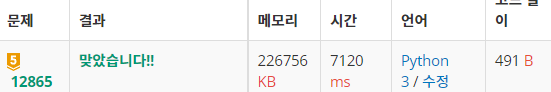
- [코드 출처](https://claude-u.tistory.com/208)
- [설명 참고1](https://cocoon1787.tistory.com/206)
- [설명 참고2](https://st-lab.tistory.com/141)
- [설명 참고3](https://hongcoding.tistory.com/50)